# Preprocessing Eval

Use this notebook to ensure that the preprocessing module performed as expected.
Cells marked with `SET PARAMETERS` contain crucial variables that need to be set according to your specific experimental setup and data organization.
Please review and modify these variables as needed before proceeding with the analysis.

## Imports

In [1]:
import ops
from ops.imports_ipython import *
import pickle 
import glob
import tifffile
from microfilm import microplot
from microfilm.microplot import Micropanel

## SET PARAMETERS

In [2]:
# Directory for loading and saving files
METADATA_DIR = "output/metadata"
SBS_TIF_DIR = "output/sbs_tif"
PH_TIF_DIR = "output/ph_tif"
IC_DIR = "output/illumination_correction"
EVAL_DIR = "output/eval"

# Define wells to preprocess
WELLS = ["A1", "A2"]

# Define SBS cycles/tiles to preprocess
SBS_CYCLES = list(range(1, 12))
SBS_TILES = [1, 100]

# Define phenotype tiles to preprocess
PH_TILES = [1, 100]

# Parse function parameters
PARSE_FUNCTION_HOME = "input"
PARSE_FUNCTION_DATASET = "example_dataset"

# Test well and cycle to evaluate on
TEST_WELL = "A1"
TEST_CYCLE = "c1"

In [3]:
# Create eval directory
os.makedirs(EVAL_DIR, exist_ok=True)

# Determine number of wells and cycles
well_num = len(WELLS)
cycle_num = len(SBS_CYCLES)

# Get all SBS/PH TIFF files
sbs_tiff_files = glob.glob(f"{SBS_TIF_DIR}/*.tif")
ph_tiff_files = glob.glob(f"{PH_TIF_DIR}/*.tif")

### Check if metadata & file generation went to plan:

In [4]:
# Calculate the total number of expected metadata files
expected_metadata_files = well_num + (cycle_num * well_num)

# Calculate the total number of actual metadata files
metadata_files = [file for file in os.listdir(METADATA_DIR) if file.endswith('.pkl')]
num_metadata_files = len(metadata_files)

# Split metadata files into 20X (PH) and 10X (SBS) pickle files
metadata_files_ph = [file for file in metadata_files if '20X' in file]
metadata_files_sbs = [file for file in metadata_files if '10X' in file]

# Print the results
print("Expected number of metadata files:", expected_metadata_files)
print("Actual number of metadata files:", num_metadata_files)

# Initialize total row count for PH metadata
total_ph_metadata_rows = 0

# Iterate over each 20X (PH) metadata file
for ph_metadata_file in metadata_files_ph:
    # Construct the full file path
    file_path = f"{METADATA_DIR}/{ph_metadata_file}"
    
    # Open the PKL file in binary mode and load the data
    with open(file_path, 'rb') as file:
        ph_metadata = pickle.load(file)
        
        # Assuming ph_metadata is a pandas DataFrame, add its row count to the total
        total_ph_metadata_rows += len(ph_metadata)

# Print the total row count for PH metadata
print("Total number of metadata rows in all PH files:", total_ph_metadata_rows)

# Count the number of PH TIFF files
num_ph_tiff_files = len(ph_tiff_files)

# Define scaling factor (1 channel for PH images)
scaling_factor = 1  

# Calculate and print the expected number of metadata entries
expected_ph_metadata_entries = num_ph_tiff_files / scaling_factor
print(f"Expected number of metadata entries (PH TIFF files / scaling factor): {expected_ph_metadata_entries}")

# Initialize total row count for SBS metadata
total_sbs_metadata_rows = 0

# Iterate over each 10X (SBS) metadata file
for sbs_metadata_file in metadata_files_sbs:
    # Construct the full file path
    file_path = f"{METADATA_DIR}/{sbs_metadata_file}"
    
    # Open the PKL file in binary mode and load the data
    with open(file_path, 'rb') as file:
        sbs_metadata = pickle.load(file)
        
        # Assuming sbs_metadata is a pandas DataFrame, add its row count to the total
        total_sbs_metadata_rows += len(sbs_metadata)

# Print the total row count for SBS metadata
print("Total number of metadata rows in all SBS files:", total_sbs_metadata_rows)

# Count the number of SBS TIFF files
num_sbs_tiff_files = len(sbs_tiff_files)

# Calculate scaling factor for SBS 
# 1 channel for SBS images
scaling_factor = 1

# Calculate and print the expected number of metadata entries
expected_sbs_metadata_entries = num_sbs_tiff_files / scaling_factor
print(f"Expected number of metadata entries (SBS TIFF files / scaling factor): {expected_sbs_metadata_entries}")

Expected number of metadata files: 24
Actual number of metadata files: 24
Total number of metadata rows in all PH files: 4
Expected number of metadata entries (PH TIFF files / scaling factor): 4.0
Total number of metadata rows in all SBS files: 44
Expected number of metadata entries (SBS TIFF files / scaling factor): 44.0


### Generate maps of metadata, and check if initial sites is a logical choice

In [5]:
# Find and load PH metadata for the test well
ph_test_metadata = None
for ph_metadata_file in metadata_files_ph:
    if TEST_WELL in ph_metadata_file:
        with open(f"{METADATA_DIR}/{ph_metadata_file}", 'rb') as f:
            ph_test_metadata = pickle.load(f)
        break

if ph_test_metadata is not None:
    print(f"PH metadata file found for test well {TEST_WELL}!")
else:
    print(f"No PH metadata file found for test well {TEST_WELL}")

# Find and load SBS metadata for the test well and cycle
sbs_test_metadata = None
for sbs_metadata_file in metadata_files_sbs:
    if TEST_WELL in sbs_metadata_file and TEST_CYCLE in sbs_metadata_file:
        with open(f"{METADATA_DIR}/{sbs_metadata_file}", 'rb') as f:
            sbs_test_metadata = pickle.load(f)
        break

if sbs_test_metadata is not None:
    print(f"SBS metadata file found for test well {TEST_WELL} and cycle {TEST_CYCLE}!")
else:
    print(f"No SBS metadata file found for test well {TEST_WELL} and cycle {TEST_CYCLE}")

PH metadata file found for test well A1!
SBS metadata file found for test well A1 and cycle c1!


Grid view of phenotype metadata X-Y positions:


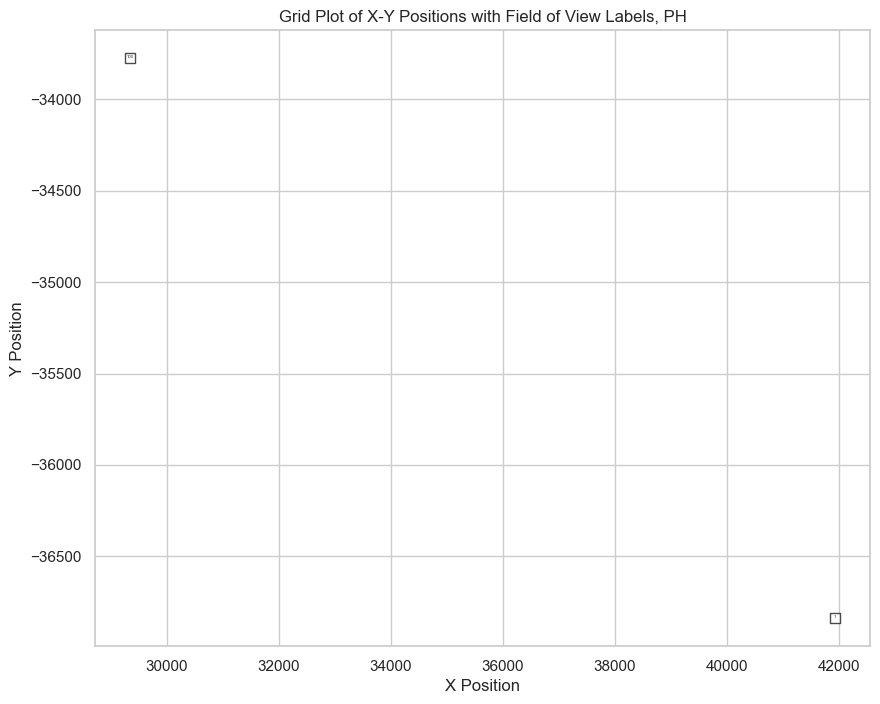

Grid view of SBS metadata X-Y positions:


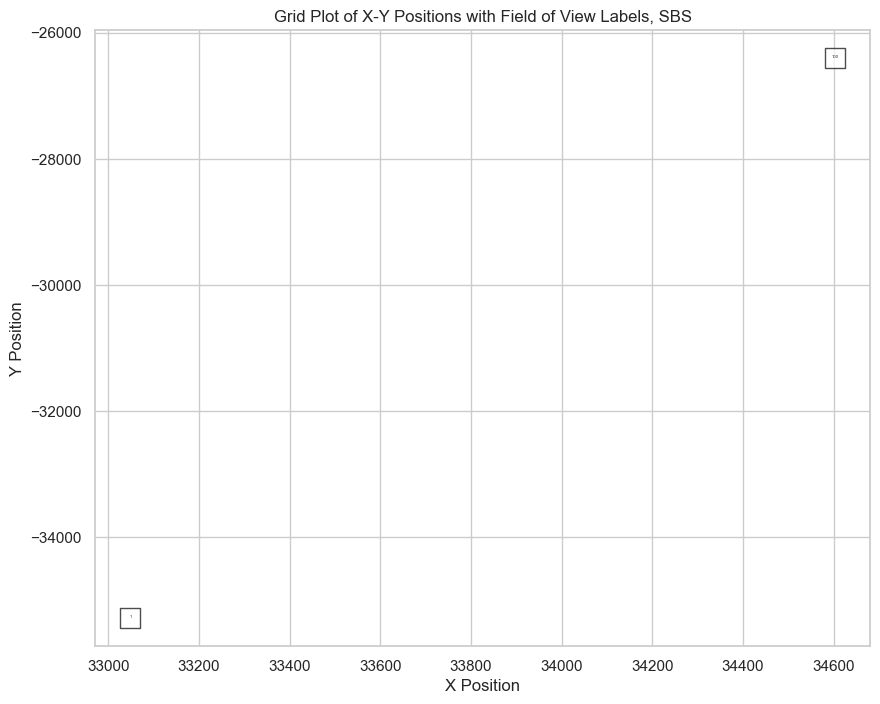

Grid view of combined metadata X-Y positions:


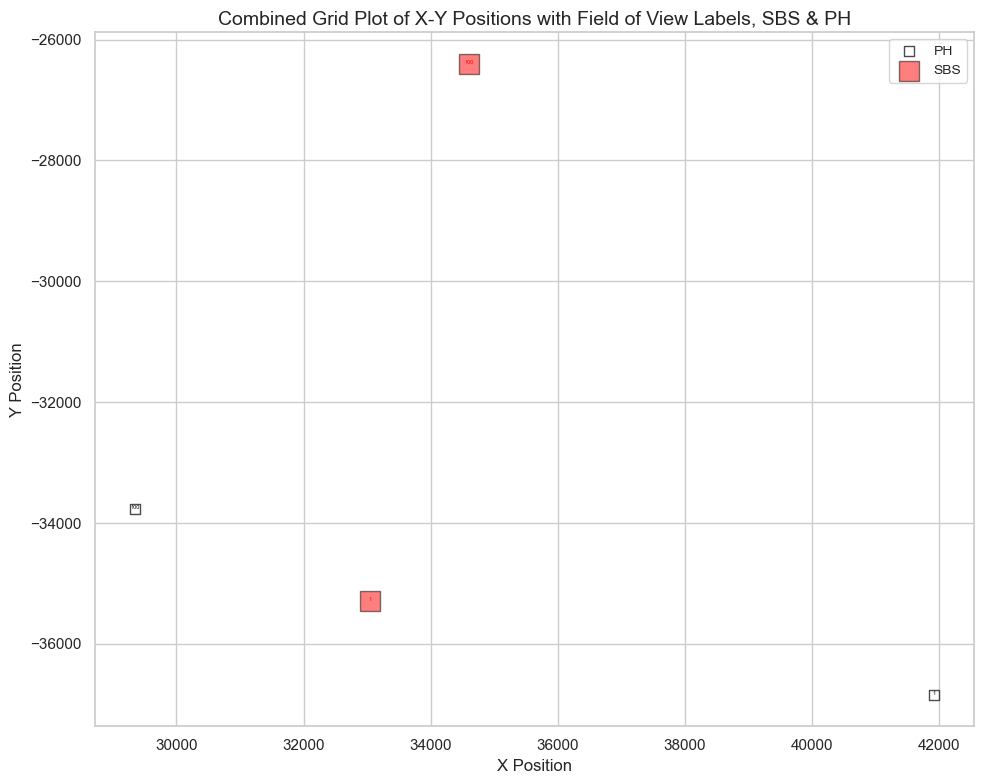

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Scatter plot with squares for each point
plt.scatter(ph_test_metadata['x_data'], ph_test_metadata['y_data'], 
            s=50, c='white', marker='s', edgecolors='black', 
            linewidths=1, alpha=0.7)

# Label each point with the 'field_of_view' variable
for i, txt in enumerate(ph_test_metadata['field_of_view']):
    plt.annotate(txt, (ph_test_metadata['x_data'].iloc[i], ph_test_metadata['y_data'].iloc[i]), 
                 textcoords="offset points", xytext=(0,0), ha='center', fontsize=3)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Grid Plot of X-Y Positions with Field of View Labels, PH')

# Save the figure as an SVG file
print("Grid view of phenotype metadata X-Y positions:")
plt.savefig(f"{EVAL_DIR}/ph_metadata_example.svg", format='svg', dpi=1200)
plt.show()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Scatter plot with squares for each point
plt.scatter(sbs_test_metadata['x_data'], sbs_test_metadata['y_data'], 
            s=200, c='white', marker='s', edgecolors='black', 
            linewidths=1, alpha=0.7)

# Label each point with the 'field_of_view' variable
for i, txt in enumerate(sbs_test_metadata['field_of_view']):
    plt.annotate(txt, (sbs_test_metadata['x_data'].iloc[i], sbs_test_metadata['y_data'].iloc[i]), 
                 textcoords="offset points", xytext=(0,0), ha='center', fontsize=3)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Grid Plot of X-Y Positions with Field of View Labels, SBS')

# Save the figure as an SVG file
print("Grid view of SBS metadata X-Y positions:")
plt.savefig(f"{EVAL_DIR}/sbs_metadata_example.svg", format='svg', dpi=1200)
plt.show()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Scatter plot for PH data
plt.scatter(ph_test_metadata['x_data'], ph_test_metadata['y_data'], 
            s=50, c='white', marker='s', edgecolors='black', 
            linewidths=1, alpha=0.7, label='PH')

# Label each PH point with the 'field_of_view' variable
for i, txt in enumerate(ph_test_metadata['field_of_view']):
    plt.annotate(txt, (ph_test_metadata['x_data'].iloc[i], ph_test_metadata['y_data'].iloc[i]), 
                 textcoords="offset points", xytext=(0,0), ha='center', fontsize=4, color='black')

# Scatter plot for SBS data
plt.scatter(sbs_test_metadata['x_data'], sbs_test_metadata['y_data'], 
            s=200, c='red', marker='s', edgecolors='black', 
            linewidths=1, alpha=0.5, label='SBS')

# Label each SBS point with the 'field_of_view' variable
for i, txt in enumerate(sbs_test_metadata['field_of_view']):
    plt.annotate(txt, (sbs_test_metadata['x_data'].iloc[i], sbs_test_metadata['y_data'].iloc[i]), 
                 textcoords="offset points", xytext=(0,0), ha='center', fontsize=4, color='red')

# Set labels and title
plt.xlabel('X Position', fontsize=12)
plt.ylabel('Y Position', fontsize=12)
plt.title('Combined Grid Plot of X-Y Positions with Field of View Labels, SBS & PH', fontsize=14)

plt.legend(fontsize=10)
plt.tight_layout()

# Save the figure as an SVG file
print("Grid view of combined metadata X-Y positions:")
plt.savefig(f"{EVAL_DIR}/combined_metadata_example.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()

## Preview Test Tiles Metadata and Images

Filtered phenotype test metadata:


,x_data,y_data,z_data,pfs_offset,field_of_view,filename
0,41922.3,-36839.3,3162.68,10199,1,input/ph/P001_Pheno_20x_Wells-A1_Points-001__C...
1,29349.5,-33774.3,3159.34,10199,100,input/ph/P001_Pheno_20x_Wells-A1_Points-100__C...


Filtered SBS test metadata:


,x_data,y_data,z_data,pfs_offset,field_of_view,filename
0,33049.0,-35283.0,3139.66,8063,1,input/sbs/P001_SBS_10x_C1_Wells-A1_Points-001_...
1,34602.4,-26403.1,3125.04,8063,100,input/sbs/P001_SBS_10x_C1_Wells-A1_Points-100_...


Loading SBS images...
SBS test cycle image file path: output/sbs_tif/10X_c10-SBS-10_A1_Tile-1.sbs.tif
SBS test cycle image shape: (5, 1200, 1200)
Cycle 1 preview:


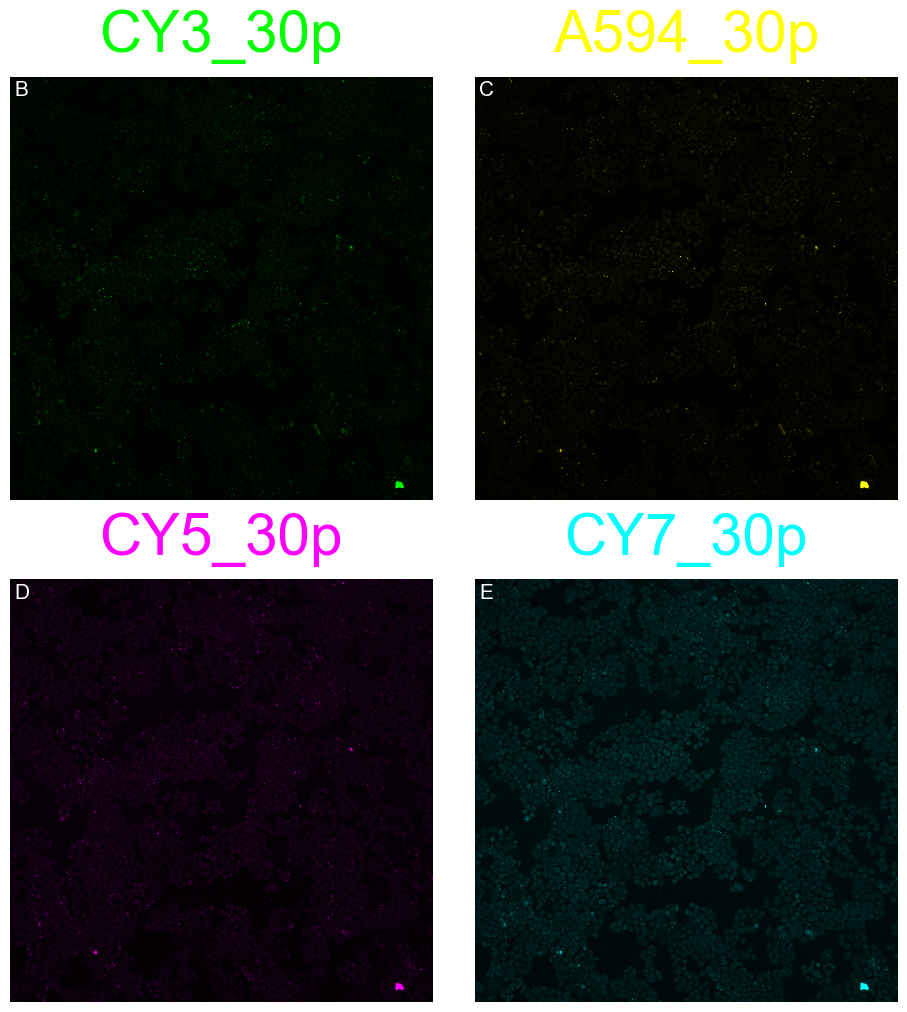

Loading phenotype images...
PH image file path: output/ph_tif/20X_A1_Tile-1.phenotype.tif
PH image shape: (4, 2400, 2400)
Preview:


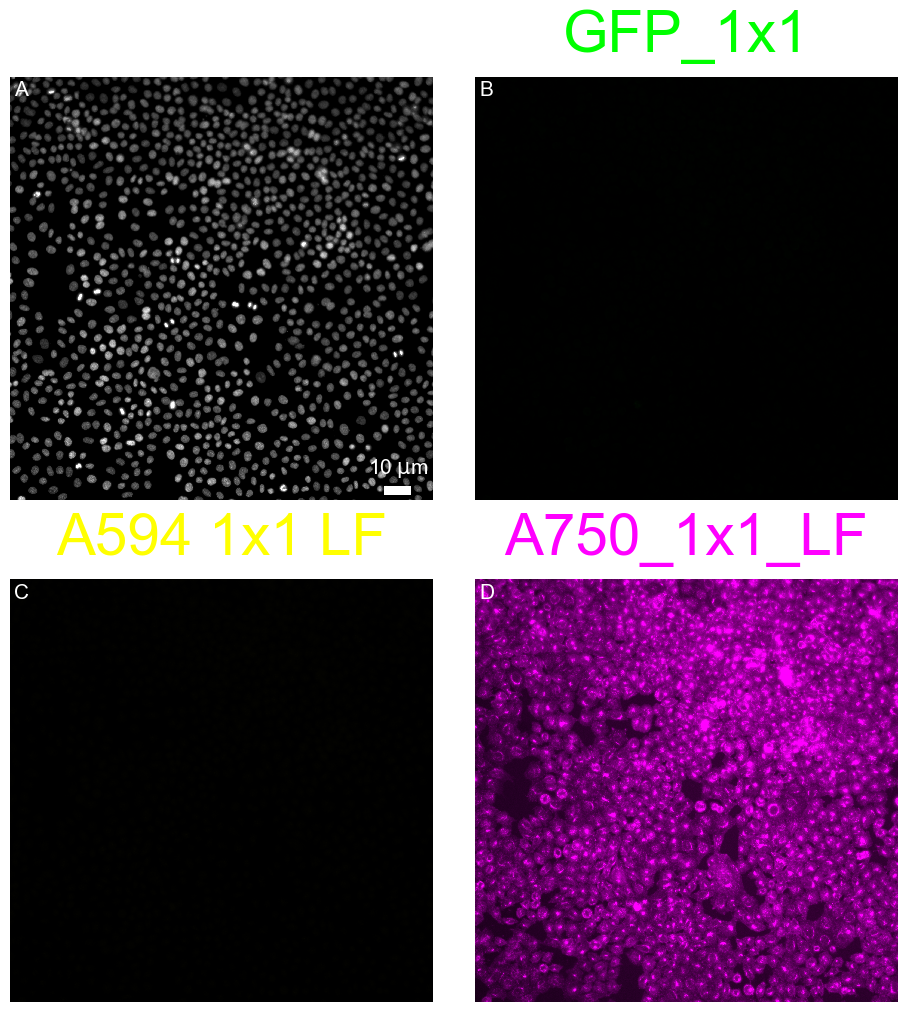

In [7]:
# Filter the PH test metadata to include only the specified tiles
filtered_ph_test_metadata = ph_test_metadata[ph_test_metadata['field_of_view'].isin(PH_TILES)]
print("Filtered phenotype test metadata:")
display(filtered_ph_test_metadata)

# Filter the SBS test metadata to include only the specified tiles
filtered_sbs_test_metadata = sbs_test_metadata[sbs_test_metadata['field_of_view'].isin(SBS_TILES)]
print("Filtered SBS test metadata:")
display(filtered_sbs_test_metadata)

print("Loading SBS images...")
# Find and load a specific SBS image for the test cycle
sbs_test_cycle_image = None
for file_path in sbs_tiff_files:
    # Check if the file matches the criteria: test_well, test_cycle, and specific tile
    if all(substring in file_path for substring in [TEST_WELL, TEST_CYCLE, f"Tile-{SBS_TILES[0]}.sbs"]):
        print(f"SBS test cycle image file path: {file_path}")
        # Read the multi-page TIFF image
        sbs_test_cycle_image = tifffile.imread(file_path)
        print(f"SBS test cycle image shape: {sbs_test_cycle_image.shape}")
        break

print("Cycle 1 preview:")
# Define channel order and colors for SBS images
channel_order_sbs = ['DAPI', 'CY3_30p', 'A594_30p', 'CY5_30p', 'CY7_30p']
cmaps = ['pure_blue', 'pure_green', 'pure_yellow', 'pure_magenta', 'pure_cyan']
DISPLAY_RANGES = [
    [500, 7500],
    [100, 10000],
    [100, 10000],
    [200, 25000],
    [200, 25000]
]

# Create microshow plots for each channel with specified colormaps and display ranges
microim0_sbs = microplot.Microimage(sbs_test_cycle_image[0], 
                                    rescale_type='limits',
                                    limits=DISPLAY_RANGES[0],
                                    label_text='A', 
                                    channel_names=channel_order_sbs[0],
                                    unit='um', scalebar_unit_per_pix=0.065, scalebar_size_in_units=10,
                                    scalebar_font_size=15, scalebar_thickness=0.02)

microim1_sbs = microplot.Microimage(sbs_test_cycle_image[1],
                                    cmaps=cmaps[1],
                                    rescale_type='limits',
                                    limits=DISPLAY_RANGES[1],
                                    label_text='B',
                                    channel_names=channel_order_sbs[1])

microim2_sbs = microplot.Microimage(sbs_test_cycle_image[2],
                                    cmaps=cmaps[2],
                                    rescale_type='limits', 
                                    limits=DISPLAY_RANGES[2],
                                    label_text='C',
                                    channel_names=channel_order_sbs[2])

microim3_sbs = microplot.Microimage(sbs_test_cycle_image[3],
                                    cmaps=cmaps[3], 
                                    rescale_type='limits', 
                                    limits=DISPLAY_RANGES[3],
                                    label_text='D',
                                    channel_names=channel_order_sbs[3])

microim4_sbs = microplot.Microimage(sbs_test_cycle_image[4],
                                    cmaps=cmaps[4], 
                                    rescale_type='limits',
                                    limits=DISPLAY_RANGES[4], 
                                    label_text='E',
                                    channel_names=channel_order_sbs[4])

# Create a panel to display the images
panel = Micropanel(rows=2, cols=2, figscaling=5)
panel.add_element([0,0], microim1_sbs)
panel.add_element([0,1], microim2_sbs)
panel.add_element([1,0], microim3_sbs)
panel.add_element([1,1], microim4_sbs)
panel.add_channel_label()
plt.show()

print("Loading phenotype images...")
# Find and load the channel PH (Phase) image
ph_image = None
for file_path in ph_tiff_files:
    if all(substring in file_path for substring in [TEST_WELL, f"Tile-{PH_TILES[0]}.phenotype"]):
        print(f"PH image file path: {file_path}")
        ph_image = tifffile.imread(file_path)
        print(f"PH image shape: {ph_image.shape}")
        break

print("Preview:")
# Define channel order and colors
channel_order_ph = ['DAPI_1x1', 'GFP_1x1', 'A594 1x1 LF', 'A750_1x1_LF']
cmaps = ['pure_blue', 'pure_green', 'pure_yellow', 'pure_magenta']
DISPLAY_RANGES = [
    [500, 10000],
    [100, 50000],
    [100, 50000],
    [100, 7500]
]

# Create microshow plots for each channel with specified colormaps and display ranges
microim0_ph = microplot.Microimage(ph_image[0], 
                                   rescale_type='limits',
                                   limits=DISPLAY_RANGES[0],
                                   label_text='A', 
                                   channel_names=channel_order_ph[0],
                                   unit='um', scalebar_unit_per_pix=0.065, scalebar_size_in_units=10,
                                   scalebar_font_size=15, scalebar_thickness=0.02)

microim1_ph = microplot.Microimage(ph_image[1],
                                   cmaps=cmaps[1],
                                   rescale_type='limits',
                                   limits=DISPLAY_RANGES[1],
                                   label_text='B',
                                   channel_names=channel_order_ph[1])

microim2_ph = microplot.Microimage(ph_image[2],
                                   cmaps=cmaps[2],
                                   rescale_type='limits',
                                   limits=DISPLAY_RANGES[2],
                                   label_text='C',
                                   channel_names=channel_order_ph[2])

microim3_ph = microplot.Microimage(ph_image[3],
                                   cmaps=cmaps[3],
                                   rescale_type='limits',
                                   limits=DISPLAY_RANGES[3],
                                   label_text='D',
                                   channel_names=channel_order_ph[3])

panel = Micropanel(rows=2, cols=2, figscaling=5)
panel.add_element([0,0], microim0_ph)
panel.add_element([0,1], microim1_ph)
panel.add_element([1,0], microim2_ph)
panel.add_element([1,1], microim3_ph)
panel.add_channel_label()
plt.show()

### Preview SBS vs PH images

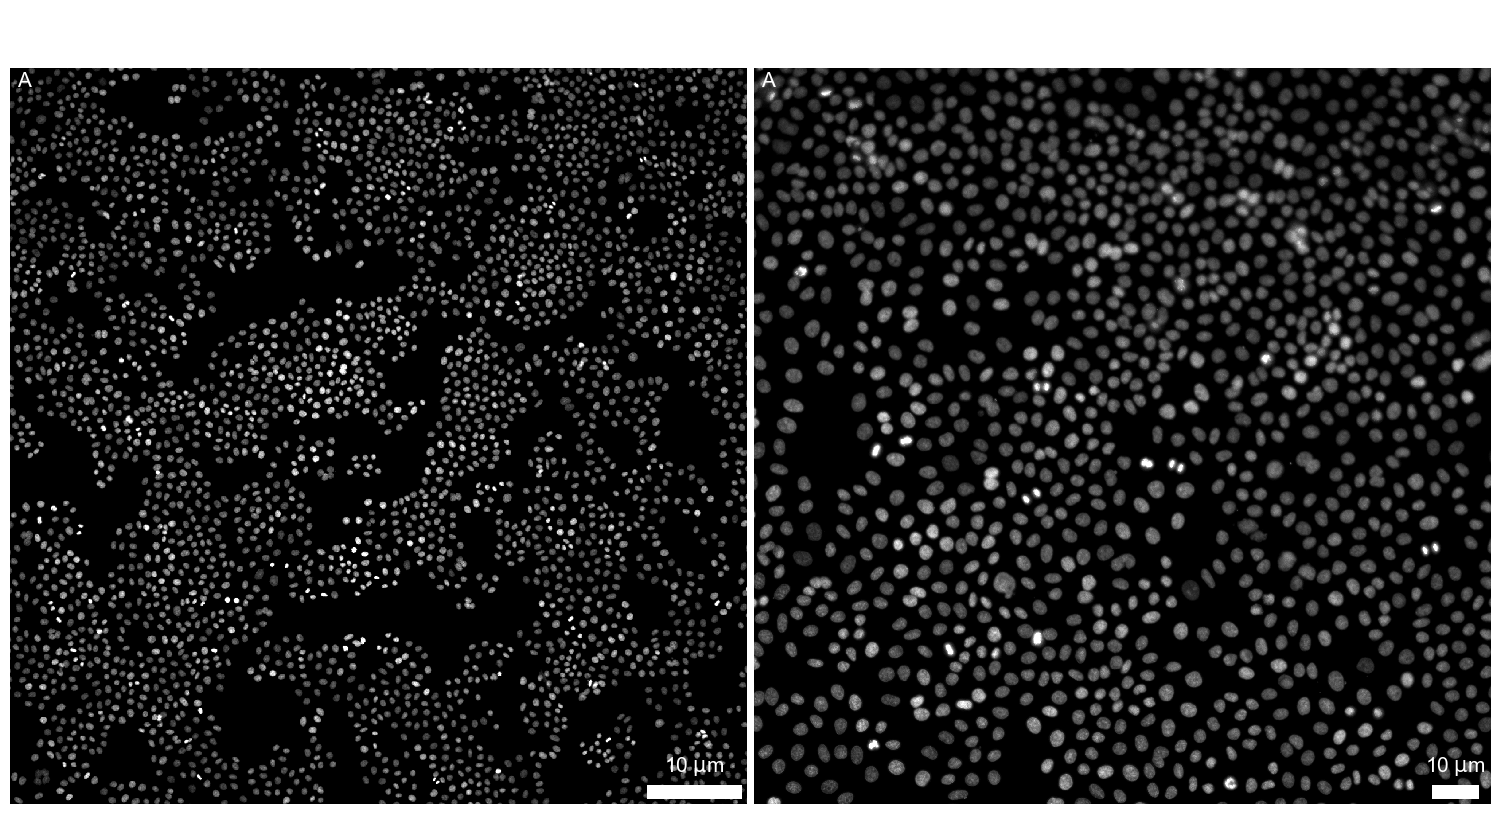

In [8]:
# Create a panel to compare DAPI images from SBS and PH
panel_dapi_merged = Micropanel(rows=1, cols=2, figscaling=8)
panel_dapi_merged.add_element([0,0], microim0_sbs)
panel_dapi_merged.add_element([0,1], microim0_ph)
panel_dapi_merged.add_channel_label()